In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install  pydicom

     |████████████████████████████████| 35.5MB 89kB/s 


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline  

import zipfile
import pydicom

In [4]:
# Filepaths
base_path = '/content/gdrive/My Drive/AIML/Capstone/Pneumonia_Detection'

images_path = base_path +'/stage_2_train_images.zip'
train_images_Label_path = base_path +'/stage_2_train_labels.csv.zip'

test_images_path = base_path +'/stage_2_test_images.zip'

In [5]:
with zipfile.ZipFile(images_path,'r') as zip_ref:
  zip_ref.extractall('/train/images')  


In [6]:
with zipfile.ZipFile(train_images_Label_path,'r') as zip_ref:
  zip_ref.extractall('/train/csv') 
  zip_ref.close()

In [7]:
# common values
image_size = 1024
channel = 1

In [8]:
train_labels_data = pd.read_csv('/train/csv/stage_2_train_labels.csv')

In [9]:
train_labels_data.shape

(30227, 6)

In [10]:
train_labels_data.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [11]:
train_labels_data.info()
# Here we have total samples 30227.
# and we got only 9555 non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [16]:
# let's check missing values count.
train_labels_data.isna().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

**Let's check for duplicate patientId's in data set.**


```
Here, I am checking duplicat patientId values because, 
1.   Because of typo.
2.   Actually There might be two records.


```


In [28]:
# As, I have checked above, there are no missing values in 'patientId' inpute feature.
# But, when I check number of unique 'patientId's in 'image_labels_data' data set, I found that '26684' 'patientId's are unique.

print('Are thre any duplicate patientIds in data?: {}'.format(train_labels_data.patientId.duplicated().any()))
print('Number of unique patientID: {}'.format(train_labels_data.patientId.nunique()))


Are thre any duplicate patientIds in data?: True
Number of unique patientID: 26684


In [43]:
# Let's take one unique duplicate 'patientId' from data set.
patientIds =  train_labels_data.patientId
duplicate_patientId_df = train_labels_data[patientIds.isin(patientIds[patientIds.duplicated()])].sort_values(by=['patientId'])
duplicate_patientId_df.head()
# As we can see, there are duplicate entries in the data set.

,patientId,x,y,width,height,Target
28990,000db696-cf54-4385-b10b-6b16fbb3f985,316.0,318.0,170.0,478.0,1
28991,000db696-cf54-4385-b10b-6b16fbb3f985,660.0,375.0,146.0,402.0,1
28992,000fe35a-2649-43d4-b027-e67796d412e0,570.0,282.0,269.0,409.0,1
28993,000fe35a-2649-43d4-b027-e67796d412e0,83.0,227.0,296.0,438.0,1
28994,001031d9-f904-4a23-b3e5-2c088acd19c6,66.0,160.0,373.0,608.0,1


In [44]:
# Let's plot dicom and draw these coordinates on image.

In [65]:
image_path = '/train/images/'+duplicate_patientId_df.patientId.iloc[0]+'.dcm'
print('image path \n {}'.format(image_path))

image path 
 /train/images/000db696-cf54-4385-b10b-6b16fbb3f985.dcm


In [59]:
# Read the dicom image by using 'pydicom' package. The image belongs to  'duplicate_patientId_df' data frame.
image_data = pydicom.read_file(image_path)
print('image information\n {}'.format(image_data))

image information
 Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.25090.1517874463.16030
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.25090.1517874463.16030
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030)

Size of the image : (1024, 1024)


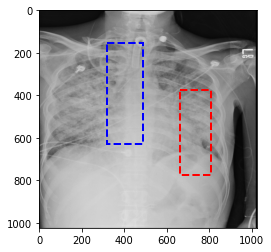

In [71]:
x11 = duplicate_patientId_df.x.iloc[0]
y11 = duplicate_patientId_df.y.iloc[0]

width_1= duplicate_patientId_df.width.iloc[0]
height_1  = duplicate_patientId_df.height.iloc[0]

x21 = width_1+ x11
y21 = height_1 + y11

#----------------
x12 = duplicate_patientId_df.x.iloc[1]
y12 = duplicate_patientId_df.y.iloc[1]

width_2= duplicate_patientId_df.width.iloc[1]
height_2  = duplicate_patientId_df.height.iloc[1]

x22 = width_2+ x12
y22 = height_2 + y12

im = image_data.pixel_array
print('Size of the image : {}'.format(im.shape))

fig, ax = plt.subplots(1)
ax.imshow(im,cmap='gray')
rect_1= patches.Rectangle((x11,y1),width_1,height_1,edgecolor='b',facecolor='none',linestyle='--', linewidth=2)
rect_2= patches.Rectangle((x12,y12),width_2,height_2,edgecolor='r',facecolor='none',linestyle='--', linewidth=2)
ax.add_patch(rect_1)
ax.add_patch(rect_2)